# Experiment Result 

In [1]:
from IPython.display import Markdown, display

# Read the README.md file
with open('README.md', 'r') as file:
	readme_content = file.read()

# Display the content as Markdown
display(Markdown(readme_content))


# A Neuron-Level Analysis of Implicit Gender Bias in Vision Transformer

This folder contains the supplementary source code for the paper "A Neuron-Level Analysis of Implicit Gender Bias in Vision Transformer".

## Overview

This project provides a neuron-level analysis to dissect how implicit gender bias is encoded and applied across all components of a pre-trained Vision Transformer (ViT). By identifying gender-sensitive neurons and using Attn-LRP, we trace relevance to two key intra-layer components—the raw activations (post-GELU) and the normalized outputs (post-LayerNorm)—under both normal and context-masked conditions.

## Reproducibility Details

To ensure full reproducibility, we provide the key hyperparameters and environmental details for our experiments.

### Fine-tuning Hyperparameters

The `train.py` script was run for the model fine-tuning stage with the following settings:
* **Model:** `vit-base-patch16-224`
* **Dataset:** CelebA
* **Optimizer:** AdamW
* **Learning Rate:** 3e-4
* **Weight Decay:** 1e-4
* **Batch Size:** 64
* **Number of Epochs:** 12
* **Random Seed:** 42

### Analysis Parameters

* **Primary Confidence Threshold:** 0.9
* **Robustness Check Threshold:** 0.5
* **Primary Neuron Selection (k):** 5
* **Sensitivity Analysis Neuron Selection (k):** 10

### Computational Environment

* **Key Libraries:**
    * Python >=3.11
    * PyTorch 2.7.1+cu126
    * Transformers 4.54.1

## Requirements

The code is written in >= Python3.11 . The main dependencies can be installed via pip install -r requirements.txt.
*Note: Please ensure that you have the torch with CUDA support installed for GPU acceleration.*

Primary Libraries
- torch
- transformers
- pandas
- numpy
- matplotlib
- seaborn
- scipy
- statsmodels
- pingouin
- opencv-python


## 1. Setup Instructions

### Step 1: Directory Structure
After unzipping this supplementary file, you will have the main project folder containing all the necessary scripts.

### Step 2: Download Datasets

**IEAT Image Dataset:**
The images for the main analysis are from the IEAT repository.
```bash
# Clone the IEAT repository
git clone [https://github.com/ryansteed/ieat.git](https://github.com/ryansteed/ieat.git)

# Create the necessary directories in your project root
mkdir -p data/male
mkdir -p data/female

# Copy the images into your project structure
cp ieat/data/experiments/gender/male/* data/male/
cp ieat/data/experiments/gender/female/* data/female/
```
You can delete the ieat repository after copying the images, as they are not needed for the analysis.

**CelebA Dataset:**
The model fine-tuning requires the CelebA dataset.

- Download the "Align&Cropped Images" (img_align_celeba.zip) from the official CelebA dataset page and unzip it at the root directory.

- Download the "Attribute Annotations" (list_attr_celeba.txt).

- Place list_attr_celeba.txt in the root directory.

### Step 3: Install Attn-LRP Dependency
#### 1. Clone the original Attn-LRP repository
git clone [https://github.com/rachtibat/LRP-eXplains-Transformers.git](https://github.com/rachtibat/LRP-eXplains-Transformers.git)

#### 2. Enter the repository directory
cd LRP-eXplains-Transformers

#### 3. IMPORTANT: Modify setup.py
##### Open setup.py in a text editor. Due to a character encoding issue, 
##### you must comment out or delete the two lines related to `long_description`.
#####

```python
# Find and comment out these lines:
 with open("README.md", "r") as fh:
     long_description = fh.read()

# And change the `long_description` argument to be empty:
 long_description="",
```
#### 4. Replace codes for hugging face ViT model
You need to replace the original lxt directoy in the LRP-eXplains-Transformers repository with the modified version that supports Hugging Face ViT models.
This the modified vaersion can be found among the source code files in this unzipped source file.

#### 5. Install the modified package in editable mode
pip install -e .

#### 6. Return to the root of your project directory
cd ..

## 2. Running the Experiments
The experiments are designed to be run in a sequence.

### Step 1: Data Preprocessing (Face Feathering)
Run the face_feathering.ipynb Jupyter notebook. This script reads the raw images from the data/male and data/female directories, applies the segmentation masks from your annotation files (e.g., male_annotations.json), and saves the feathered, context-free images to the masked_male_feathered/ and masked_female_feathered/ directories.

### Step 2: Model Fine-tuning
Run the training script to fine-tune the ViT model for gender classification on CelebA if you do not have "vit_gender_cls_single.pth".

```bash

python train.py
```
This will train the model and save the best-performing weights as vit_gender_cls_single.pth in the root directory. This model file is required for the subsequent LRP analysis.

### Step 3: Run Full Analysis Pipeline
The experiment.py script is the main entry point to run all analyses, including LRP relevance calculation, neuron consistency checks, heatmaps, and all statistical tests.

You can choose which version of the analysis to run by modifying the boolean flags within the script:

To run the primary analysis (for main paper results):

```bash
python experiment.py --robust_check
```
To run the robustness check (with 0.5 threshold):

```bash
python experiment.py --sensitivity_check
```
To run the sensitivity analysis (with top-10 neurons):

```bash
python experiment.py 
```
This will run the main analysis

--------------------------------------------------------------------------------
File Descriptions

train.py: Script for fine-tuning the ViT model on CelebA for gender classification.

face_feathering.ipynb: Jupyter notebook for data preprocessing (masking and feathering).

lrp_run.py: Contains the core logic for running Attn-LRP on images to generate relevance scores.

consistency.py: Calculates and plots the consistency of top-ranked neurons.

heatmap.py: Generates the aggregate cosine similarity heatmaps with significance masking.

pairwise_ttest.py: Performs the paired t-tests and FDR correction.

ind_ttest.py: Performs the independent t-tests and FDR correction.

experiment.py: The main script to orchestrate and run the full analysis pipeline.

result.ipynb: Jupyter notebook for visualizing the results of the LRP analysis.

pairwise ttest results: male_final_results.csv, female_final_results.csv, masked_female_final_results.csv, masked_male_final_results.csv, male_intermediate_results.csv, female_intermediate_results.csv, masked_female_intermediate_results.csv, masked_male_intermediate_results.csv

independent ttest results: masked_final_results.csv, masked_intermediate_results.csv, unmasked_final_results.csv, unmasked_intermediate_results.csv

consistency plot: masked_consistency_plot.png, unmasked_consistency_plot.png



## Consistency Analysis

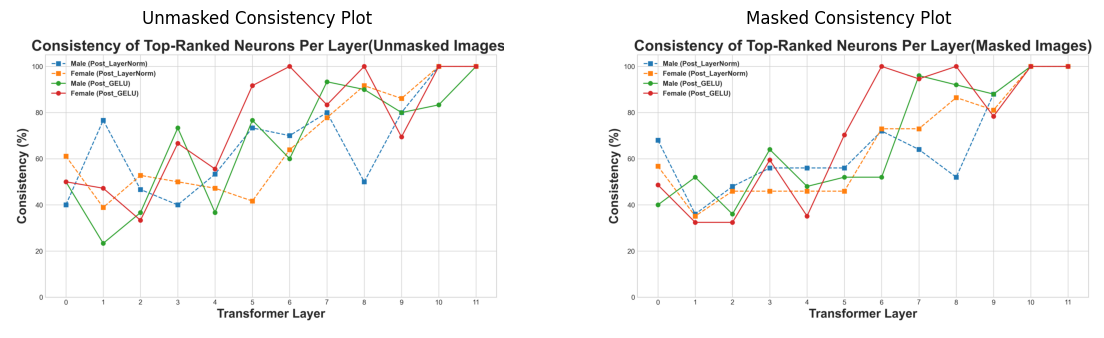

In [2]:
import matplotlib.pyplot as plt

img1 = plt.imread('unmasked_consistency_plot.png')
img2 = plt.imread('masked_consistency_plot.png')
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.axis('off')
plt.title('Unmasked Consistency Plot')
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.axis('off')
plt.title('Masked Consistency Plot')
plt.show()



### Specific Neurons for Unmasked Female Images at Final Component

unlike the plot above, here we do not exclude images bwlow 0.9 confidence score

In [2]:
import os
from collections import Counter
import json
root_path = "vit_relevance/female"
all_layers = {}
for img_path in os.listdir(root_path):
	if "json" in img_path:
		continue
	full_path = os.path.join(root_path, img_path, "top5_relevance_female_vit.json")
	fulldata = json.load(open(full_path, "r"))
	for layer, data in fulldata.items():
		if layer not in all_layers:
			all_layers[layer] = Counter()
		neurons = data["top5_index"]
		all_layers[layer].update(neurons)


In [3]:
for layer, counter in all_layers.items():
	print(f"Layer: {layer}")
	most_common = counter.most_common(3)
	for neuron, count in most_common:
		print(f"  Neuron #{neuron}: {count} times")

Layer: 0
  Neuron #281: 23 times
  Neuron #82: 14 times
  Neuron #259: 13 times
Layer: 1
  Neuron #507: 16 times
  Neuron #581: 15 times
  Neuron #678: 13 times
Layer: 2
  Neuron #507: 20 times
  Neuron #512: 12 times
  Neuron #97: 8 times
Layer: 3
  Neuron #236: 18 times
  Neuron #128: 15 times
  Neuron #507: 13 times
Layer: 4
  Neuron #100: 18 times
  Neuron #69: 16 times
  Neuron #88: 12 times
Layer: 5
  Neuron #69: 18 times
  Neuron #311: 12 times
  Neuron #100: 12 times
Layer: 6
  Neuron #314: 25 times
  Neuron #134: 22 times
  Neuron #605: 14 times
Layer: 7
  Neuron #134: 32 times
  Neuron #605: 30 times
  Neuron #393: 16 times
Layer: 8
  Neuron #134: 36 times
  Neuron #605: 17 times
  Neuron #663: 14 times
Layer: 9
  Neuron #663: 35 times
  Neuron #414: 25 times
  Neuron #134: 23 times
Layer: 10
  Neuron #605: 40 times
  Neuron #88: 33 times
  Neuron #663: 33 times
Layer: 11
  Neuron #605: 40 times
  Neuron #702: 40 times
  Neuron #577: 40 times


## Heatmap Analysis

### SEM and Mean Heatmap (Unmasked)

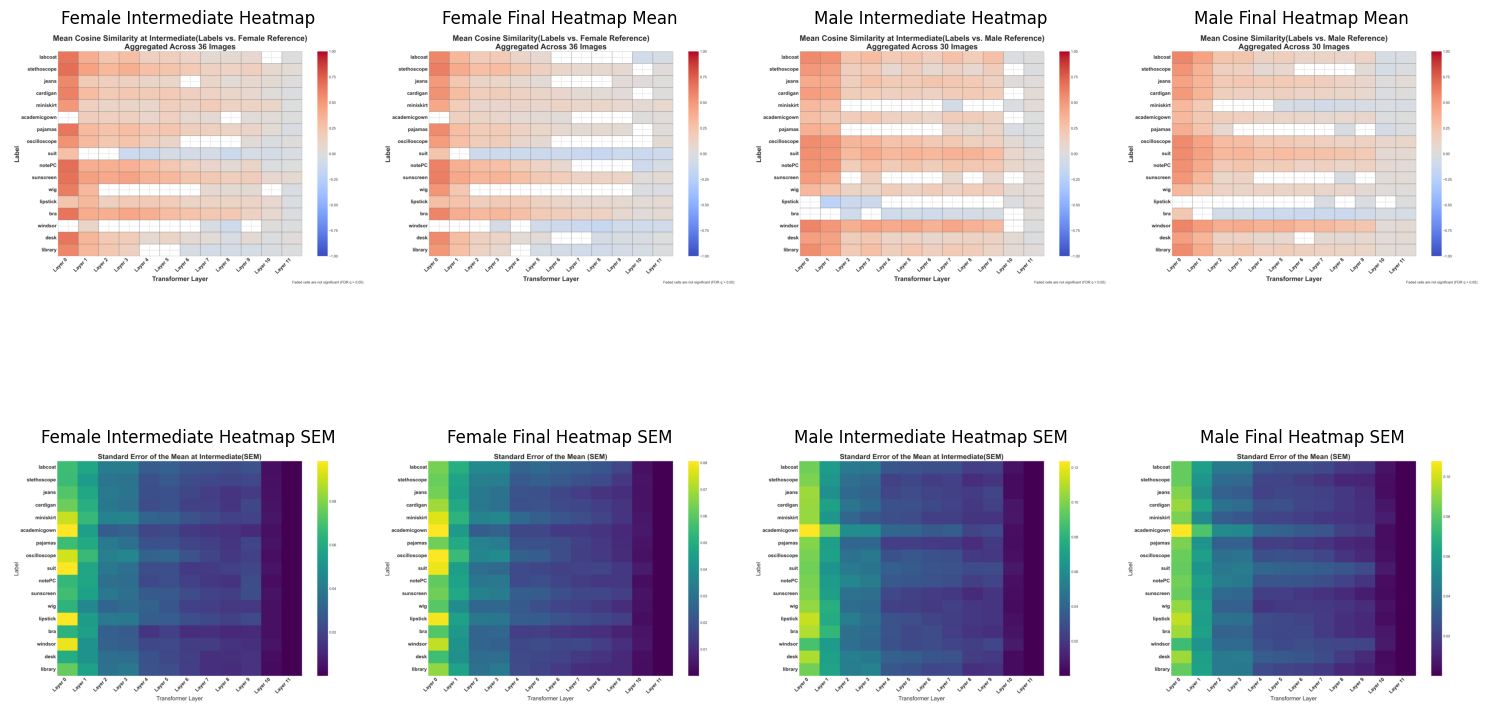

In [4]:
img1 = plt.imread('relevance_similarity/female/AGGREGATE_intermediate_heatmap_with_significance.png')
img2 = plt.imread('relevance_similarity/female/AGGREGATE_heatmap_with_significance.png')
img3 = plt.imread('relevance_similarity/male/AGGREGATE_intermediate_heatmap_with_significance.png')
img4 = plt.imread('relevance_similarity/male/AGGREGATE_heatmap_with_significance.png')
img5 = plt.imread('relevance_similarity/female/AGGREGATE_intermediate_heatmap_sem.png')
img6 = plt.imread('relevance_similarity/female/AGGREGATE_heatmap_sem.png')
img7 = plt.imread('relevance_similarity/male/AGGREGATE_intermediate_heatmap_sem.png')
img8 = plt.imread('relevance_similarity/male/AGGREGATE_heatmap_sem.png')
plt.figure(figsize=(15, 10))
plt.subplot(2, 4, 1)
plt.imshow(img1)
plt.axis('off')
plt.title('Female Intermediate Heatmap')
plt.subplot(2, 4, 2)
plt.imshow(img2)
plt.axis('off')
plt.title('Female Final Heatmap Mean')
plt.subplot(2, 4, 3)
plt.imshow(img3)
plt.axis('off')
plt.title('Male Intermediate Heatmap')
plt.subplot(2, 4, 4)
plt.imshow(img4)
plt.axis('off')
plt.title('Male Final Heatmap Mean')
plt.subplot(2, 4, 5)
plt.imshow(img5)
plt.axis('off')
plt.title('Female Intermediate Heatmap SEM')
plt.subplot(2, 4, 6)
plt.imshow(img6)
plt.axis('off')
plt.title('Female Final Heatmap SEM')
plt.subplot(2, 4, 7)
plt.imshow(img7)
plt.axis('off')
plt.title('Male Intermediate Heatmap SEM')
plt.subplot(2, 4, 8)
plt.imshow(img8)
plt.axis('off')
plt.title('Male Final Heatmap SEM')
plt.tight_layout()
plt.show()

###  SEM and Mean Heatmap (Masked)

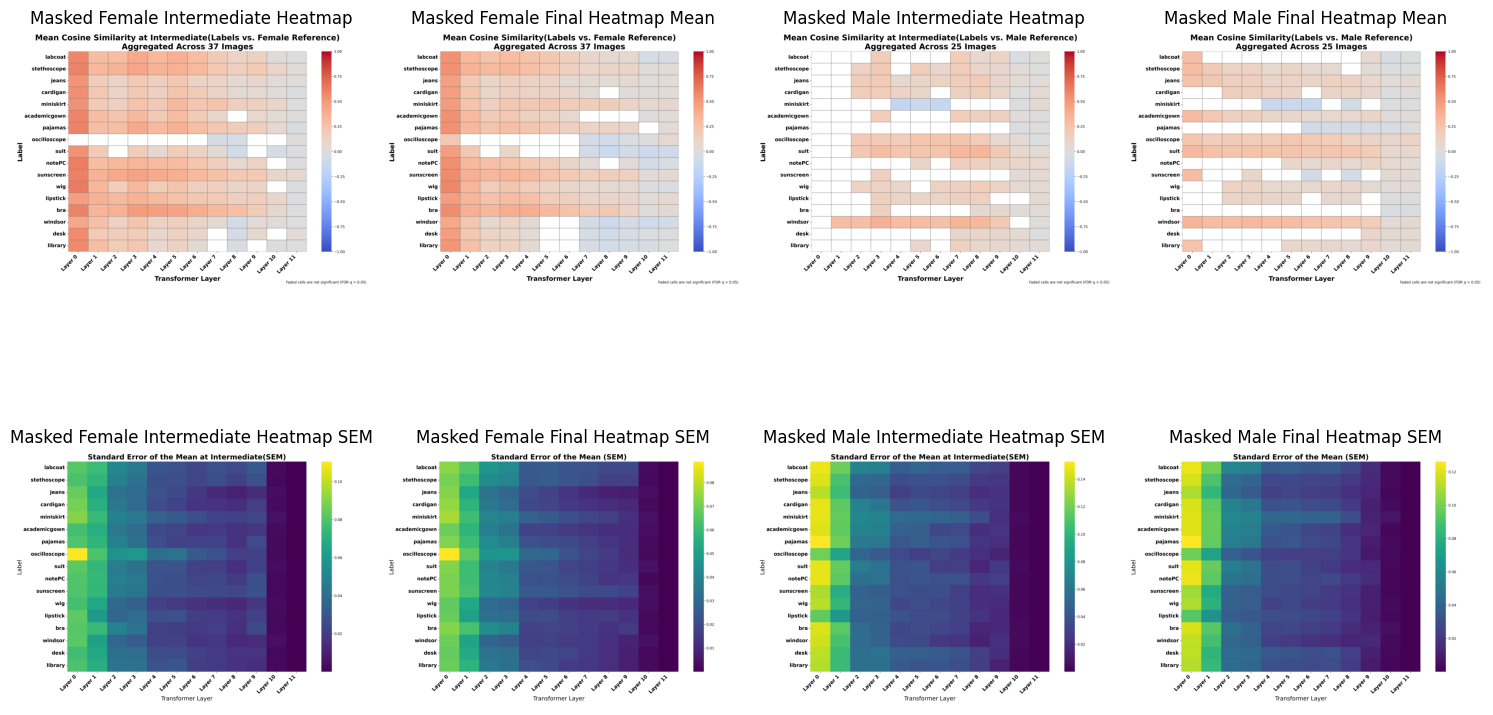

In [9]:
img1 = plt.imread('relevance_similarity/masked_female/AGGREGATE_intermediate_heatmap_with_significance.png')
img2 = plt.imread('relevance_similarity/masked_female/AGGREGATE_heatmap_with_significance.png')
img3 = plt.imread('relevance_similarity/masked_male/AGGREGATE_intermediate_heatmap_with_significance.png')
img4 = plt.imread('relevance_similarity/masked_male/AGGREGATE_heatmap_with_significance.png')
img5 = plt.imread('relevance_similarity/masked_female/AGGREGATE_intermediate_heatmap_sem.png')
img6 = plt.imread('relevance_similarity/masked_female/AGGREGATE_heatmap_sem.png')
img7 = plt.imread('relevance_similarity/masked_male/AGGREGATE_intermediate_heatmap_sem.png')
img8 = plt.imread('relevance_similarity/masked_male/AGGREGATE_heatmap_sem.png')
plt.figure(figsize=(15, 10))
plt.subplot(2, 4, 1)
plt.imshow(img1)
plt.axis('off')
plt.title('Masked Female Intermediate Heatmap')
plt.subplot(2, 4, 2)
plt.imshow(img2)
plt.axis('off')
plt.title('Masked Female Final Heatmap Mean')
plt.subplot(2, 4, 3)
plt.imshow(img3)
plt.axis('off')
plt.title('Masked Male Intermediate Heatmap')
plt.subplot(2, 4, 4)
plt.imshow(img4)
plt.axis('off')
plt.title('Masked Male Final Heatmap Mean')
plt.subplot(2, 4, 5)
plt.imshow(img5)
plt.axis('off')
plt.title('Masked Female Intermediate Heatmap SEM')
plt.subplot(2, 4, 6)
plt.imshow(img6)
plt.axis('off')
plt.title('Masked Female Final Heatmap SEM')
plt.subplot(2, 4, 7)
plt.imshow(img7)
plt.axis('off')
plt.title('Masked Male Intermediate Heatmap SEM')
plt.subplot(2, 4, 8)
plt.imshow(img8)
plt.axis('off')
plt.title('Masked Male Final Heatmap SEM')
plt.tight_layout()
plt.show()

## Pairwise T-test

the test is performed between the relevance scores on the gender-sensitive neurons on a paired label.
if the q-value is below 0.05, we can conclude that the difference between the two groups is statistically significant and show the results in the table below together with the t-stats, p-value, q-value and Cohen'd.

### Top50 Gender Sensitive Neurons

In [3]:
import pandas as pd
df = pd.read_csv("pairwise_ttest/top50_global_results.csv")
display(df)

,comparison,category,layer,t_stat,p_value,q_value,cohen_d
0,academicgown vs oscilloscope,masked_female_final,11,80.44,2.560000e-145,3.340000e-141,2.44
1,academicgown vs oscilloscope,female_final,11,79.34,2.040000e-141,1.330000e-137,2.44
2,cardigan vs pajamas,male_final,11,-53.48,3.820000e-99,1.660000e-95,3.29
3,oscilloscope vs windsor,masked_female_final,11,-41.87,5.340000e-96,1.740000e-92,1.24
4,oscilloscope vs windsor,female_final,11,-41.30,1.950000e-93,5.080000e-90,1.24
5,academicgown vs bra,masked_female_intermediate,11,-37.15,1.900000e-87,4.130000e-84,1.37
6,academicgown vs bra,female_intermediate,11,-36.65,4.050000e-85,7.560000e-82,1.37
7,cardigan vs pajamas,masked_male_final,11,-48.79,8.660000e-83,1.410000e-79,3.29
8,stethoscope vs windsor,masked_female_intermediate,11,34.33,6.260000e-82,9.070000e-79,2.41
9,stethoscope vs windsor,female_intermediate,11,33.86,9.470000e-80,1.240000e-76,2.41


### Pairwise T-test Results (Unmasked Male final)

In [ ]:
df = pd.read_csv("pairwise_ttest/male_final_results.csv")
df.rename(columns={'True': 'Comparison'}, inplace=True)
display(df)

,Comparison,Layer 0,Layer 1,Layer 2,Layer 3,Layer 4,Layer 5,Layer 6,Layer 7,Layer 8,Layer 9,Layer 10,Layer 11
0,labcoat vs stethoscope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t=8.86 p=0.00e+00 q=0.00e+00 d=0.61,t=4.60 p=0.00e+00 q=1.00e-04 d=0.40
1,labcoat vs jeans,NaN,NaN,t=2.54 p=1.21e-02 q=2.96e-02 d=0.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t=11.24 p=0.00e+00 q=0.00e+00 d=1.53,t=7.32 p=0.00e+00 q=0.00e+00 d=0.96
2,labcoat vs cardigan,NaN,t=-3.74 p=3.00e-04 q=1.10e-03 d=0.21,NaN,NaN,NaN,NaN,NaN,t=2.89 p=4.40e-03 q=1.26e-02 d=0.31,NaN,t=2.48 p=1.42e-02 q=3.40e-02 d=0.30,t=11.66 p=0.00e+00 q=0.00e+00 d=1.45,t=12.41 p=0.00e+00 q=0.00e+00 d=1.59
3,labcoat vs miniskirt,NaN,t=-2.57 p=1.11e-02 q=2.75e-02 d=0.21,NaN,t=-2.51 p=1.31e-02 q=3.17e-02 d=0.22,NaN,NaN,NaN,NaN,NaN,t=2.59 p=1.07e-02 q=2.66e-02 d=0.32,t=7.75 p=0.00e+00 q=0.00e+00 d=0.88,t=8.80 p=0.00e+00 q=0.00e+00 d=0.96
4,labcoat vs academicgown,NaN,NaN,t=2.34 p=2.06e-02 q=4.68e-02 d=0.19,NaN,NaN,t=4.03 p=1.00e-04 q=4.00e-04 d=0.34,NaN,NaN,t=2.66 p=8.60e-03 q=2.21e-02 d=0.22,NaN,t=5.86 p=0.00e+00 q=0.00e+00 d=0.40,t=4.21 p=0.00e+00 q=2.00e-04 d=0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,bra vs desk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t=-2.79 p=5.90e-03 q=1.61e-02 d=0.34,t=-2.53 p=1.25e-02 q=3.05e-02 d=0.33,t=-6.24 p=0.00e+00 q=0.00e+00 d=0.75,t=-2.95 p=3.70e-03 q=1.07e-02 d=0.30,t=-7.27 p=0.00e+00 q=0.00e+00 d=1.12
132,bra vs library,NaN,NaN,NaN,t=-2.96 p=3.60e-03 q=1.05e-02 d=0.35,NaN,NaN,t=-2.73 p=7.10e-03 q=1.89e-02 d=0.35,t=-4.58 p=0.00e+00 q=1.00e-04 d=0.51,t=-3.34 p=1.10e-03 q=3.60e-03 d=0.40,t=-9.21 p=0.00e+00 q=0.00e+00 d=1.19,t=-15.02 p=0.00e+00 q=0.00e+00 d=1.47,t=-7.95 p=0.00e+00 q=0.00e+00 d=1.17
133,windsor vs desk,NaN,NaN,NaN,NaN,NaN,t=3.82 p=2.00e-04 q=8.00e-04 d=0.34,t=2.67 p=8.30e-03 q=2.16e-02 d=0.27,t=3.98 p=1.00e-04 q=5.00e-04 d=0.38,NaN,NaN,t=2.91 p=4.10e-03 q=1.18e-02 d=0.31,NaN
134,windsor vs library,NaN,t=-2.57 p=1.13e-02 q=2.80e-02 d=0.16,NaN,t=-3.44 p=8.00e-04 q=2.70e-03 d=0.26,NaN,NaN,NaN,t=3.11 p=2.20e-03 q=6.90e-03 d=0.27,NaN,t=-3.83 p=2.00e-04 q=8.00e-04 d=0.44,t=-3.60 p=4.00e-04 q=1.70e-03 d=0.36,t=-2.89 p=4.40e-03 q=1.26e-02 d=0.37


### Pairwise T-test Results (Unmasked Female final)

In [ ]:
df = pd.read_csv("pairwise_ttest/female_final_results.csv")
df.rename(columns={'True': 'Comparison'}, inplace=True)
display(df)

,Comparison,Layer 0,Layer 1,Layer 2,Layer 3,Layer 4,Layer 5,Layer 6,Layer 7,Layer 8,Layer 9,Layer 10,Layer 11
0,labcoat vs stethoscope,NaN,t=-4.56 p=0.00e+00 q=1.00e-04 d=0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t=3.94 p=1.00e-04 q=5.00e-04 d=0.41
1,labcoat vs jeans,NaN,NaN,t=2.62 p=9.50e-03 q=2.43e-02 d=0.20,t=2.67 p=8.30e-03 q=2.15e-02 d=0.22,t=3.20 p=1.60e-03 q=5.20e-03 d=0.30,NaN,NaN,t=4.05 p=1.00e-04 q=4.00e-04 d=0.44,t=3.91 p=1.00e-04 q=6.00e-04 d=0.45,t=3.67 p=3.00e-04 q=1.30e-03 d=0.42,t=4.61 p=0.00e+00 q=0.00e+00 d=0.64,t=10.11 p=0.00e+00 q=0.00e+00 d=1.14
2,labcoat vs cardigan,NaN,NaN,t=3.96 p=1.00e-04 q=5.00e-04 d=0.27,t=3.57 p=5.00e-04 q=1.80e-03 d=0.25,t=4.09 p=1.00e-04 q=3.00e-04 d=0.32,NaN,t=3.14 p=2.00e-03 q=6.30e-03 d=0.27,t=5.07 p=0.00e+00 q=0.00e+00 d=0.44,t=5.64 p=0.00e+00 q=0.00e+00 d=0.46,t=4.49 p=0.00e+00 q=1.00e-04 d=0.41,t=4.77 p=0.00e+00 q=0.00e+00 d=0.56,t=9.18 p=0.00e+00 q=0.00e+00 d=1.15
3,labcoat vs miniskirt,NaN,NaN,NaN,NaN,t=2.77 p=6.10e-03 q=1.67e-02 d=0.25,NaN,NaN,t=3.17 p=1.80e-03 q=5.70e-03 d=0.31,t=5.54 p=0.00e+00 q=0.00e+00 d=0.50,t=4.55 p=0.00e+00 q=1.00e-04 d=0.43,t=5.53 p=0.00e+00 q=0.00e+00 d=0.58,t=10.62 p=0.00e+00 q=0.00e+00 d=1.22
4,labcoat vs academicgown,NaN,NaN,t=4.31 p=0.00e+00 q=1.00e-04 d=0.35,t=4.23 p=0.00e+00 q=2.00e-04 d=0.34,t=4.30 p=0.00e+00 q=1.00e-04 d=0.32,NaN,t=-3.63 p=4.00e-04 q=1.40e-03 d=0.31,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,bra vs desk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t=-2.32 p=2.13e-02 q=4.82e-02 d=0.25,t=-2.93 p=3.90e-03 q=1.12e-02 d=0.30,t=-5.94 p=0.00e+00 q=0.00e+00 d=0.68,t=-4.30 p=0.00e+00 q=1.00e-04 d=0.51,t=4.26 p=0.00e+00 q=2.00e-04 d=0.36
131,bra vs library,NaN,NaN,NaN,NaN,NaN,NaN,t=-2.49 p=1.36e-02 q=3.27e-02 d=0.26,t=-4.81 p=0.00e+00 q=0.00e+00 d=0.56,t=-3.92 p=1.00e-04 q=6.00e-04 d=0.40,t=-8.78 p=0.00e+00 q=0.00e+00 d=0.89,t=-8.05 p=0.00e+00 q=0.00e+00 d=0.79,NaN
132,windsor vs desk,NaN,NaN,NaN,t=-2.35 p=1.97e-02 q=4.50e-02 d=0.25,NaN,NaN,NaN,NaN,NaN,t=-4.42 p=0.00e+00 q=1.00e-04 d=0.46,t=-2.48 p=1.40e-02 q=3.36e-02 d=0.29,t=9.16 p=0.00e+00 q=0.00e+00 d=0.66
133,windsor vs library,NaN,NaN,NaN,NaN,NaN,NaN,t=-3.97 p=1.00e-04 q=5.00e-04 d=0.41,t=-3.93 p=1.00e-04 q=5.00e-04 d=0.41,NaN,t=-5.32 p=0.00e+00 q=0.00e+00 d=0.64,t=-5.71 p=0.00e+00 q=0.00e+00 d=0.50,NaN


## Independent T-Test
the test is performed between the relevance scores on the male/female sensitive neurons on a specific label.

if the q-value is below 0.05, we can conclude that the difference between the two groups is statistically significant and show the results in the table below together with the t-stats, p-value, q-value and Cohen'd.

### Independent T-Test (Unmasked Final Component)

In [ ]:
df = pd.read_csv("ind_ttest/unmasked_final_results.csv")
df.rename(columns={'True': 'Label'}, inplace=True)
display(df)

,Label,Layer 0,Layer 1,Layer 2,Layer 3,Layer 4,Layer 5,Layer 6,Layer 7,Layer 8,Layer 9,Layer 10,Layer 11
0,labcoat,NaN,NaN,NaN,NaN,t=-3.61 p=3.50e-04 q=1.98e-03 d=0.40,NaN,NaN,NaN,NaN,NaN,t=5.71 p=2.51e-08 q=3.72e-07 d=0.62,t=-7.76 p=1.08e-13 q=3.82e-12 d=0.84
1,stethoscope,NaN,NaN,NaN,t=-2.76 p=6.06e-03 q=2.22e-02 d=0.30,t=-2.54 p=1.16e-02 q=3.70e-02 d=0.27,NaN,NaN,t=2.56 p=1.09e-02 q=3.56e-02 d=0.28,NaN,NaN,NaN,t=-3.05 p=2.53e-03 q=1.04e-02 d=0.32
2,jeans,NaN,NaN,NaN,NaN,NaN,NaN,t=3.19 p=1.58e-03 q=6.94e-03 d=0.35,t=4.93 p=1.29e-06 q=1.35e-05 d=0.54,t=2.96 p=3.26e-03 q=1.28e-02 d=0.33,t=4.09 p=5.62e-05 q=4.24e-04 d=0.46,NaN,t=-2.90 p=3.95e-03 q=1.52e-02 d=0.32
3,cardigan,NaN,NaN,t=3.62 p=3.49e-04 q=1.98e-03 d=0.40,NaN,NaN,t=2.94 p=3.47e-03 q=1.36e-02 d=0.32,t=4.09 p=5.34e-05 q=4.07e-04 d=0.45,t=3.48 p=5.71e-04 q=2.98e-03 d=0.38,t=3.32 p=1.01e-03 q=4.86e-03 d=0.36,t=3.24 p=1.33e-03 q=6.02e-03 d=0.35,NaN,t=-12.29 p=9.28e-28 q=1.89e-25 d=1.28
4,miniskirt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t=2.70 p=7.19e-03 q=2.56e-02 d=0.29,t=3.10 p=2.12e-03 q=9.08e-03 d=0.34,NaN,NaN,t=-5.20 p=3.59e-07 q=4.18e-06 d=0.55
5,academicgown,NaN,t=-3.28 p=1.17e-03 q=5.49e-03 d=0.37,NaN,NaN,NaN,NaN,NaN,NaN,t=-2.56 p=1.10e-02 q=3.58e-02 d=0.29,NaN,t=2.64 p=8.82e-03 q=3.04e-02 d=0.29,t=-11.06 p=8.85e-23 q=9.03e-21 d=1.29
6,pajamas,NaN,NaN,NaN,NaN,NaN,t=3.42 p=7.12e-04 q=3.59e-03 d=0.37,NaN,NaN,NaN,NaN,NaN,t=-9.87 p=1.94e-19 q=1.21e-17 d=1.02
7,oscilloscope,NaN,NaN,NaN,NaN,t=-3.92 p=1.10e-04 q=7.54e-04 d=0.43,NaN,t=4.28 p=2.53e-05 q=2.04e-04 d=0.48,NaN,t=3.26 p=1.25e-03 q=5.75e-03 d=0.36,t=3.66 p=2.94e-04 q=1.74e-03 d=0.39,t=3.75 p=2.11e-04 q=1.31e-03 d=0.40,t=12.23 p=2.16e-27 q=2.70e-25 d=1.27
8,suit,NaN,NaN,NaN,NaN,NaN,NaN,t=4.61 p=6.15e-06 q=5.70e-05 d=0.52,t=4.51 p=9.81e-06 q=8.99e-05 d=0.52,NaN,t=3.77 p=1.96e-04 q=1.22e-03 d=0.41,t=7.88 p=5.07e-14 q=1.97e-12 d=0.86,NaN
9,notePC,NaN,NaN,NaN,NaN,t=-3.94 p=9.83e-05 q=6.86e-04 d=0.43,NaN,NaN,t=2.55 p=1.12e-02 q=3.62e-02 d=0.29,NaN,NaN,t=2.58 p=1.02e-02 q=3.39e-02 d=0.29,t=6.37 p=6.47e-10 q=1.35e-08 d=0.69


### Independent T-Test (Unmasked Intermediate Component)

In [ ]:
df = pd.read_csv("ind_ttest/unmasked_intermediate_results.csv")
df.rename(columns={'True': 'Label'}, inplace=True)
display(df)

,Label,Layer 0,Layer 1,Layer 2,Layer 3,Layer 4,Layer 5,Layer 6,Layer 7,Layer 8,Layer 9,Layer 10,Layer 11
0,labcoat,NaN,NaN,NaN,t=-2.57 p=1.07e-02 q=3.53e-02 d=0.28,NaN,NaN,NaN,t=12.16 p=3.02e-28 q=1.02e-25 d=1.34,t=3.49 p=5.93e-04 q=3.04e-03 d=0.41,NaN,NaN,t=12.44 p=9.07e-29 q=7.40e-26 d=1.31
1,stethoscope,NaN,NaN,NaN,t=-2.86 p=4.50e-03 q=1.72e-02 d=0.31,NaN,NaN,NaN,t=6.06 p=3.84e-09 q=6.67e-08 d=0.66,t=3.53 p=4.97e-04 q=2.67e-03 d=0.40,NaN,NaN,NaN
2,jeans,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t=2.82 p=5.21e-03 q=1.93e-02 d=0.32,NaN,NaN,NaN
3,cardigan,NaN,NaN,NaN,t=-2.56 p=1.10e-02 q=3.58e-02 d=0.28,t=2.49 p=1.33e-02 q=4.16e-02 d=0.27,NaN,t=-4.46 p=1.14e-05 q=1.03e-04 d=0.49,t=4.27 p=2.56e-05 q=2.05e-04 d=0.47,t=8.96 p=3.12e-17 q=1.82e-15 d=1.00,NaN,NaN,NaN
4,miniskirt,NaN,NaN,NaN,NaN,NaN,t=5.22 p=3.21e-07 q=3.86e-06 d=0.57,NaN,t=-6.08 p=3.38e-09 q=6.00e-08 d=0.66,NaN,t=4.98 p=1.05e-06 q=1.13e-05 d=0.55,t=-2.54 p=1.16e-02 q=3.70e-02 d=0.28,NaN
5,academicgown,t=-3.20 p=1.50e-03 q=6.71e-03 d=0.36,NaN,NaN,NaN,NaN,NaN,t=-2.82 p=5.17e-03 q=1.93e-02 d=0.32,t=4.31 p=2.17e-05 q=1.79e-04 d=0.46,t=-2.50 p=1.32e-02 q=4.13e-02 d=0.29,NaN,t=4.74 p=3.24e-06 q=3.08e-05 d=0.51,t=3.09 p=2.17e-03 q=9.23e-03 d=0.35
6,pajamas,NaN,NaN,NaN,NaN,NaN,t=3.49 p=5.45e-04 q=2.90e-03 d=0.38,t=-3.04 p=2.56e-03 q=1.05e-02 d=0.33,t=3.48 p=5.76e-04 q=2.98e-03 d=0.38,t=6.92 p=2.88e-11 q=8.34e-10 d=0.78,NaN,t=3.73 p=2.27e-04 q=1.38e-03 d=0.40,NaN
7,oscilloscope,NaN,NaN,NaN,t=-3.88 p=1.28e-04 q=8.63e-04 d=0.42,NaN,NaN,t=-2.56 p=1.11e-02 q=3.58e-02 d=0.29,t=10.58 p=1.29e-22 q=1.17e-20 d=1.17,t=4.45 p=1.23e-05 q=1.09e-04 d=0.50,NaN,t=-4.43 p=1.30e-05 q=1.14e-04 d=0.49,t=-6.74 p=7.22e-11 q=1.84e-09 d=0.74
8,suit,NaN,NaN,NaN,t=-5.84 p=1.28e-08 q=1.97e-07 d=0.64,NaN,NaN,NaN,t=6.89 p=3.05e-11 q=8.34e-10 d=0.76,NaN,t=-3.85 p=1.41e-04 q=9.32e-04 d=0.42,NaN,t=8.47 p=1.26e-15 q=6.05e-14 d=0.95
9,notePC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t=6.19 p=1.87e-09 q=3.63e-08 d=0.68,t=3.56 p=4.44e-04 q=2.45e-03 d=0.41,NaN,t=3.82 p=1.62e-04 q=1.06e-03 d=0.41,t=6.90 p=3.58e-11 q=9.42e-10 d=0.78
